In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv("wineQualityReds.csv")

In [3]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### we notice that there are no missing data

## EDA

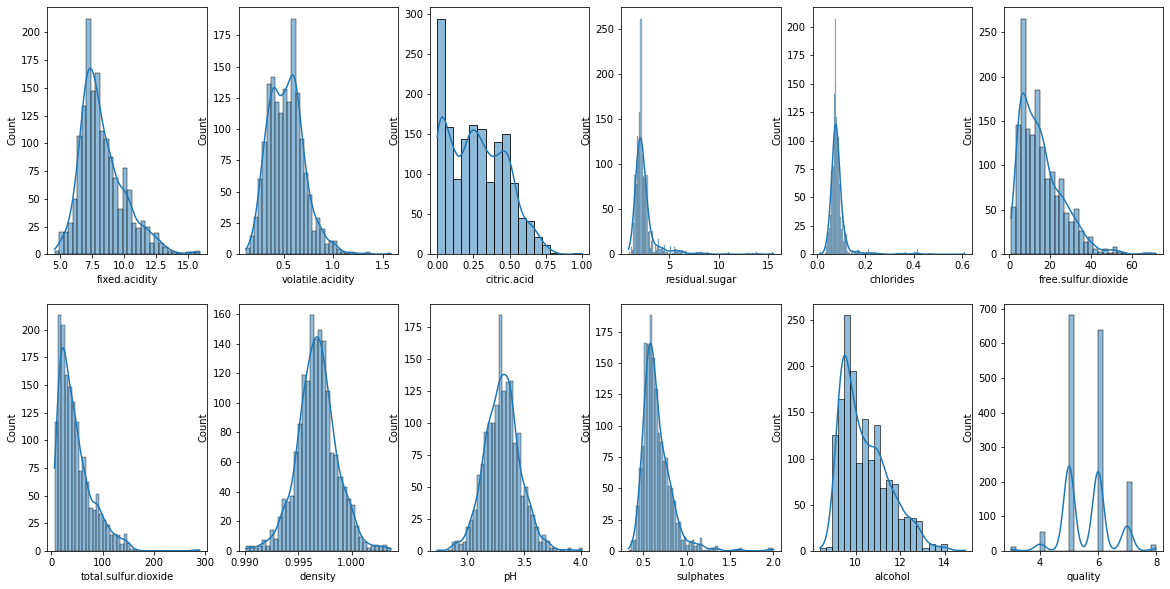

In [7]:
fig,ax= plt.subplots(ncols=6, nrows=2,figsize=(20,10))
i = 0
ax=ax.flatten()
for col in df.columns:
#     plt.figure()
    sns.histplot(data=df, x=col, kde=True, ax = ax[i])
    i=i+1

#### it seems that residual sugar and chlorides has outliers

In [8]:
df.skew(axis=0)

fixed.acidity           0.982751
volatile.acidity        0.671593
citric.acid             0.318337
residual.sugar          4.540655
chlorides               5.680347
free.sulfur.dioxide     1.250567
total.sulfur.dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [9]:
df.kurtosis(axis=0)

fixed.acidity            1.132143
volatile.acidity         1.225542
citric.acid             -0.788998
residual.sugar          28.617595
chlorides               41.715787
free.sulfur.dioxide      2.023562
total.sulfur.dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64

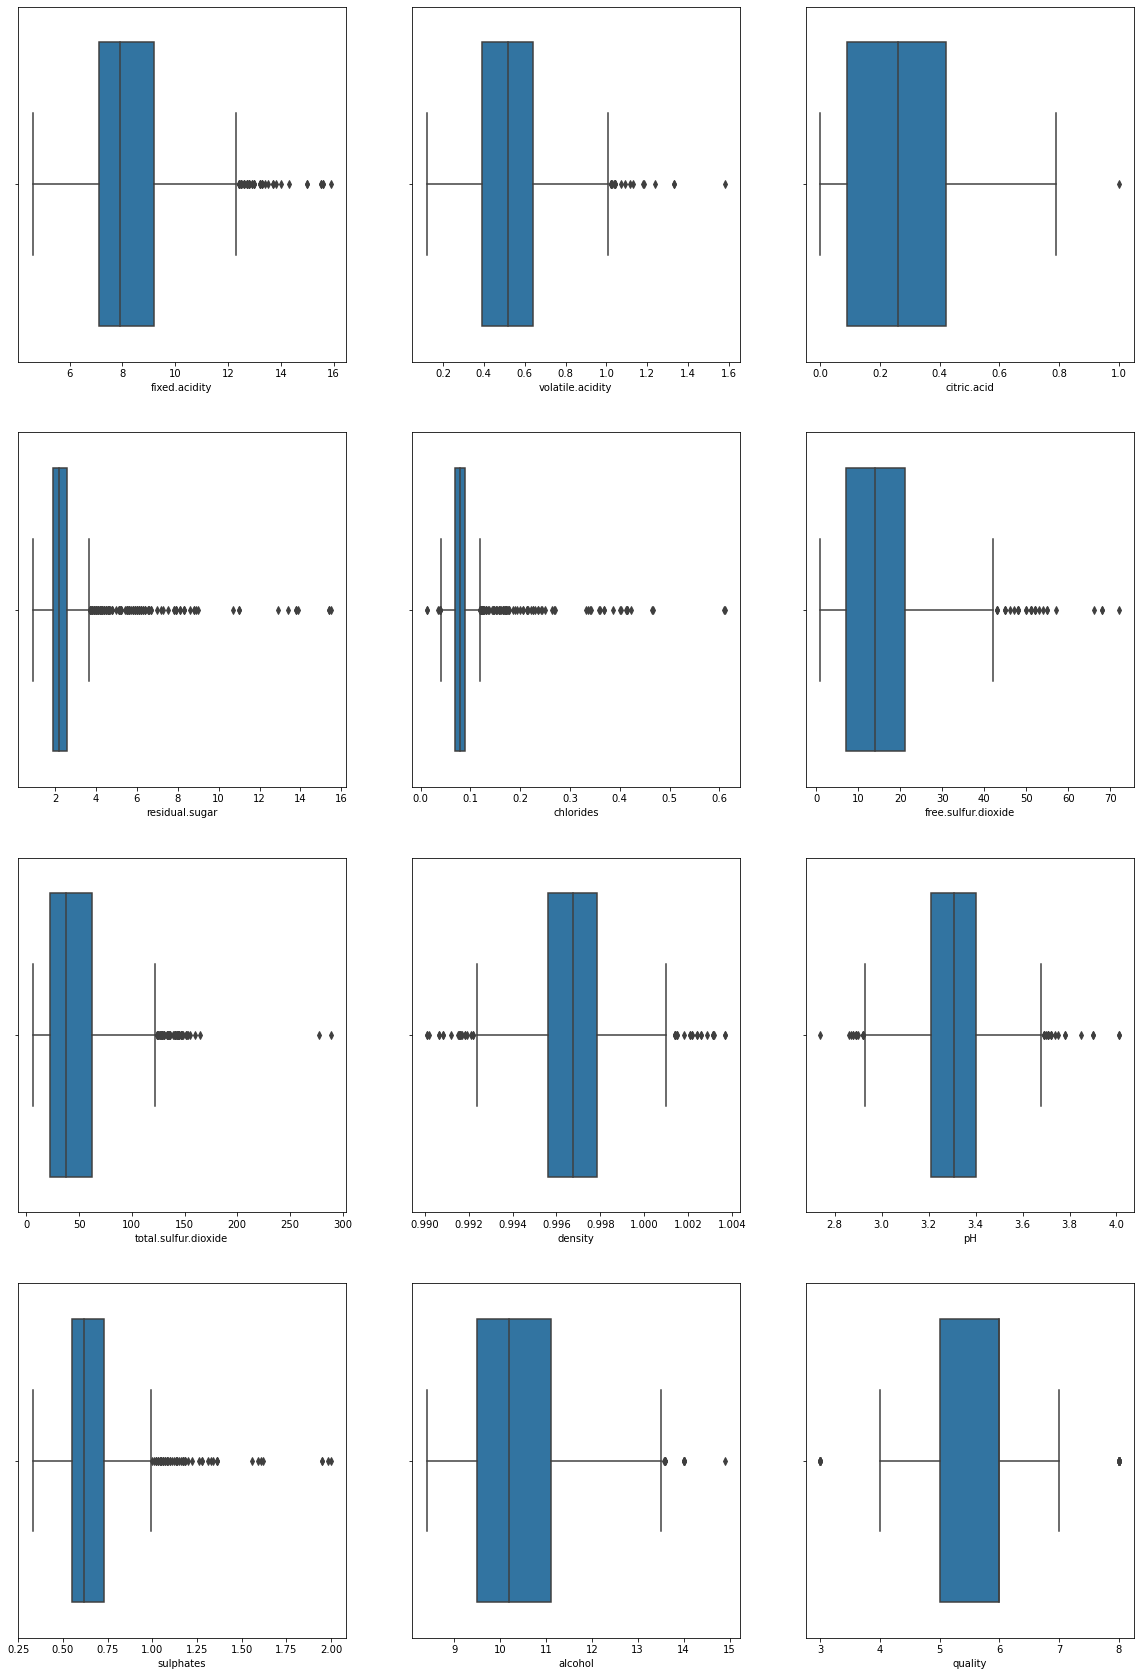

In [10]:
fig,ax= plt.subplots(ncols=3, nrows=4,figsize=(20,30))
i = 0
ax=ax.flatten()
for col in df.columns:
#     plt.figure()
    sns.boxplot(data=df, x=col, ax = ax[i])
    i=i+1

In [11]:
# dealing with the outliers in the data

In [12]:
#fixed_acidity

fa_mean = float(df['fixed.acidity'].mean())
df["fixed.acidity"] = np.where(df["fixed.acidity"] > 14.5, fa_mean, df['fixed.acidity'])

In [13]:
#volatile_acidity

va_mean = float(df['volatile.acidity'].mean())
df["volatile.acidity"] = np.where(df["volatile.acidity"] > 1.05, va_mean, df['volatile.acidity'])

In [14]:
#citric_acid

ca_mean = float(df['citric.acid'].mean())
df["citric.acid"] = np.where(df["citric.acid"] > 0.9, ca_mean, df['citric.acid'])

In [15]:
#residual sugar

rs_mean = float(df['residual.sugar'].mean())
df["residual.sugar"] = np.where(df["residual.sugar"] > 10, rs_mean, df['residual.sugar'])

In [17]:
#citric_acid

c_mean = float(df['chlorides'].mean())
df["chlorides"] = np.where(df["chlorides"] > 0.45, c_mean, df['chlorides'])

In [19]:
# finding outliers in 'free.sulfur.dioxide'
df.loc[df["free.sulfur.dioxide"] > 60]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
396,6.6,0.735,0.02,7.900000,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.900000,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
1244,5.9,0.290,0.25,2.538806,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6
1558,6.9,0.630,0.33,6.700000,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5


In [20]:
# deleting free.sulfur.dioxide outliers
df = df.drop(df.loc[df["free.sulfur.dioxide"] > 60].index)

In [21]:
# finding outliers in 'total.sulfur.dioxide'
df.loc[df["total.sulfur.dioxide"] > 200]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7


In [22]:
df = df.drop(df.loc[df["total.sulfur.dioxide"] > 200].index)

In [23]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,8.293432,0.523555,0.270296,2.447607,0.086259,15.715631,45.958569,0.996747,3.311337,0.658632,10.421940,5.635279
std,1.676233,0.169751,0.193557,1.035064,0.041008,10.111585,31.570579,0.001884,0.154188,0.169640,1.065182,0.807120
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,14.300000,1.040000,0.790000,9.000000,0.422000,57.000000,165.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
# reordering the dataframe columns in original order
df = df[['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']]

In [26]:
# calculating a correlation matrix
corr_matrix = df.corr()

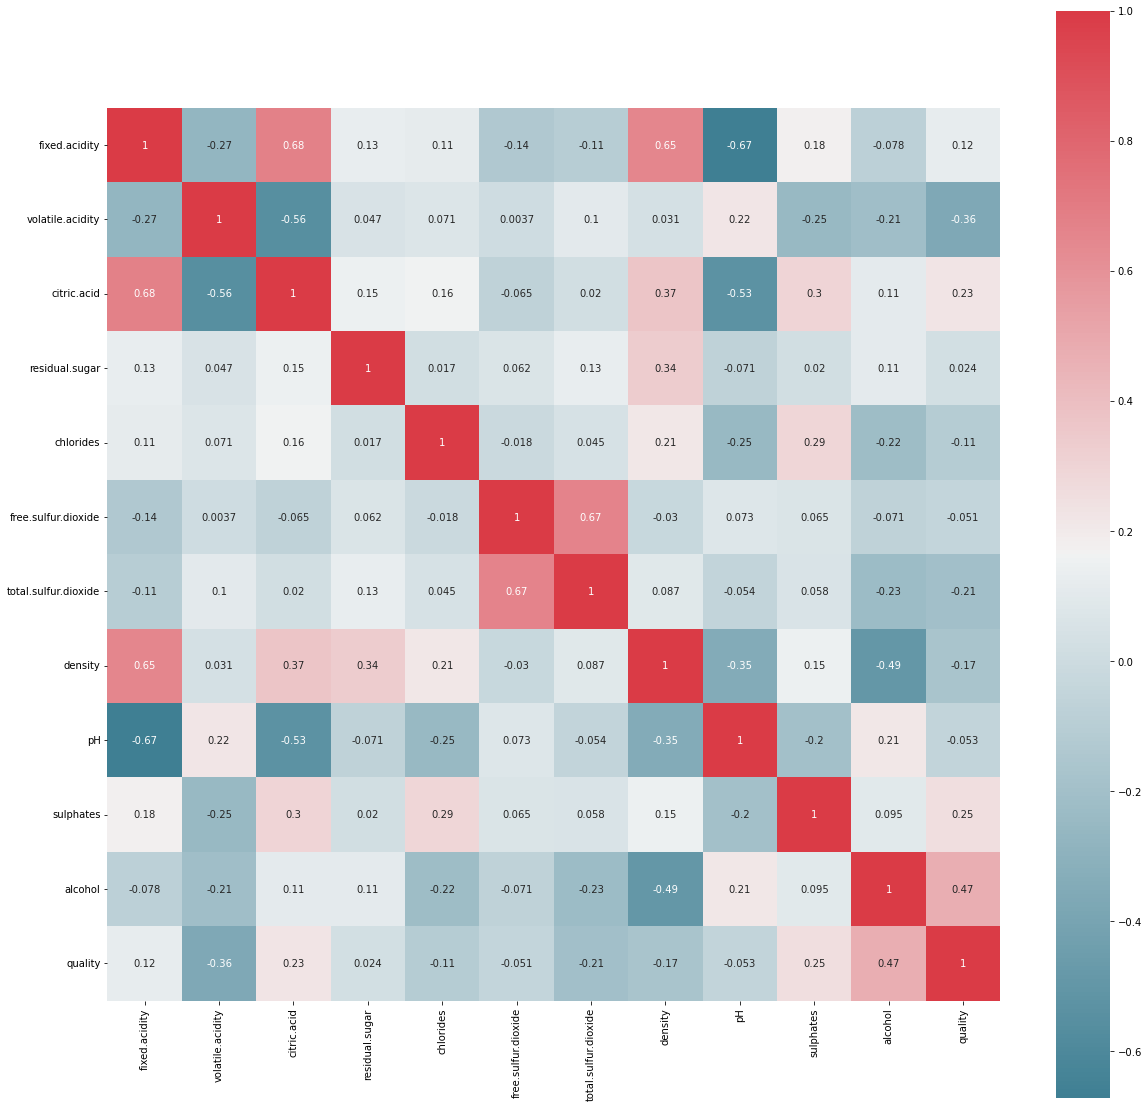

In [27]:
# drawing the heatmap
plt.figure(figsize = (20,20))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

###### From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other. For Example,


### The strongly correlated items are :

###### 1.fixed acidity and citric acid. 
###### 2.free sulphur dioxide and total sulphor dioxide. 
###### 3.fixed acidity and density.
###### 4. alcohol and quality.
###### so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.



### The weekly correlated items are :
###### 1.citric acid and volatile acidity. 
###### 2.fixed acidity and pH. 
###### 3.density and alcohol.

###### These are some relations which do not depend on each other at all.

In [28]:
# counting all the values of categorical dependent variable quality
df["quality"].value_counts(dropna=False)

5    678
6    637
7    197
4     53
8     18
3     10
Name: quality, dtype: int64

In [29]:
# converting the response variables(3-8) as binary response variables which are either good or bad


df['quality'] = df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                   6: 'good', 7: 'good', 8: 'good'})

In [30]:
df["quality"].value_counts(dropna=False)

good    852
bad     741
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

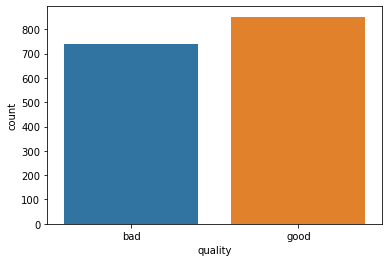

In [31]:
sns.countplot(data = df, x=df['quality'])

In [32]:
le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

df['quality'].value_counts()

1    852
0    741
Name: quality, dtype: int64

In [33]:
#dividing the dataset into dependent and independent variables

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

print(x.shape)
print(y.shape)

(1593, 11)
(1593,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                   random_state=40)

In [35]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [36]:
#standard scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Modelling

#### Logistic Regression

In [37]:
#creating the model
LogReg_model = LogisticRegression()

In [38]:
LogReg_model.fit(X_train,y_train)

LogisticRegression()

In [39]:
#predicting results for test set
y_lr_pred = LogReg_model.predict(X_test)

In [40]:
print("Accuracy :", accuracy_score(y_test, y_lr_pred))

Accuracy : 0.7178683385579937


In [41]:
print(classification_report(y_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       156
           1       0.71      0.75      0.73       163

    accuracy                           0.72       319
   macro avg       0.72      0.72      0.72       319
weighted avg       0.72      0.72      0.72       319



#### Stochastic Gradient Descent Classfier 

In [42]:
# creating the model
SGDCmodel = SGDClassifier(penalty=None)

# feeding the training model into the model
SGDCmodel.fit(X_train, y_train)

# predicting the values for the test set
y_SGDC_pred = SGDCmodel.predict(X_test)

# classification report
print(classification_report(y_test, y_SGDC_pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       156
           1       0.69      0.71      0.70       163

    accuracy                           0.69       319
   macro avg       0.69      0.69      0.69       319
weighted avg       0.69      0.69      0.69       319



In [43]:
print("Accuracy :", accuracy_score(y_test, y_SGDC_pred))

Accuracy : 0.6865203761755486


#### Support Vector Machine 

In [44]:
# creating SVC model
SVCmodel = SVC()

SVCmodel.fit(X_train, y_train)

y_SVC_pred = SVCmodel.predict(X_test)


print("Accuracy :", accuracy_score(y_test, y_SVC_pred))


Accuracy : 0.7429467084639498


In [45]:
print(classification_report(y_test, y_SVC_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       156
           1       0.75      0.75      0.75       163

    accuracy                           0.74       319
   macro avg       0.74      0.74      0.74       319
weighted avg       0.74      0.74      0.74       319



In [46]:
#finding best parameters for SVC model

In [47]:
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(SVCmodel, param_grid = param, scoring = 'accuracy', cv = 10)

In [48]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [49]:
grid_svc.best_params_

{'C': 1.3, 'gamma': 0.8, 'kernel': 'rbf'}

In [50]:
# creating new SVC model using the best parameters

SVCmodel2 = SVC(C = 1.3, gamma = 0.8, kernel = 'rbf')

SVCmodel2.fit(X_train, y_train)

y_SVC2_pred = SVCmodel2.predict(X_test)

print(classification_report(y_test, y_SVC2_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       156
           1       0.72      0.82      0.77       163

    accuracy                           0.75       319
   macro avg       0.75      0.75      0.75       319
weighted avg       0.75      0.75      0.75       319



In [51]:
print("Accuracy :", accuracy_score(y_test, y_SVC2_pred))

Accuracy : 0.7492163009404389


#### Decision Trees 

In [52]:

# creating Decision Tree model
DecisionTree_model = DecisionTreeClassifier()

DecisionTree_model.fit(X_train, y_train)

y_pred_DT = DecisionTree_model.predict(X_test)


print("Accuracy :", accuracy_score(y_test, y_pred_DT))

Accuracy : 0.7460815047021944


In [53]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       156
           1       0.73      0.80      0.76       163

    accuracy                           0.75       319
   macro avg       0.75      0.74      0.74       319
weighted avg       0.75      0.75      0.75       319



#### Random Forest 

In [54]:
# creating the Random Forest model
RF_model = RandomForestClassifier(n_estimators = 200)

RF_model.fit(X_train, y_train)

# predicting the results for the test set
y_pred_RF = RF_model.predict(X_test)

# calculating accuracy

print("Accuracy :", accuracy_score(y_test, y_pred_RF))

Accuracy : 0.774294670846395


In [55]:
# classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       156
           1       0.77      0.80      0.78       163

    accuracy                           0.77       319
   macro avg       0.77      0.77      0.77       319
weighted avg       0.77      0.77      0.77       319



#### K Nearest Neighbors 

In [56]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)

In [57]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred_KNN = classifier.predict(X_test)

In [59]:
print("Accuracy :", accuracy_score(y_test, y_pred_KNN))

Accuracy : 0.7241379310344828


In [60]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       156
           1       0.71      0.78      0.74       163

    accuracy                           0.72       319
   macro avg       0.73      0.72      0.72       319
weighted avg       0.73      0.72      0.72       319

